In [299]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [358]:
df = pd.read_csv('fifa_players.csv')

In [359]:
df['id'] = df.index

In [360]:
df.head()

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,id
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,48,22,94,94,75,96,33,28,26,0
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,46,56,84,91,67,88,59,57,22,1
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,...,78,64,82,88,82,87,63,67,67,2
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",Italy,88,88,...,34,26,83,87,61,83,51,24,22,3
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,Senegal,88,91,...,87,88,24,49,33,80,91,88,87,4


In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           17954 non-null  object 
 1   full_name                      17954 non-null  object 
 2   birth_date                     17954 non-null  object 
 3   age                            17954 non-null  int64  
 4   height_cm                      17954 non-null  float64
 5   weight_kgs                     17954 non-null  float64
 6   positions                      17954 non-null  object 
 7   nationality                    17954 non-null  object 
 8   overall_rating                 17954 non-null  int64  
 9   potential                      17954 non-null  int64  
 10  value_euro                     17699 non-null  float64
 11  wage_euro                      17708 non-null  float64
 12  preferred_foot                 17954 non-null 

In [304]:
# df.hist(figsize=(15, 10), bins=30)
# plt.tight_layout()
# plt.show()

In [305]:
# number_cols = df.select_dtypes(include=['number']).columns.tolist()

# for col in number_cols:
#     plt.figure(figsize=(5, 2))
#     sns.histplot(df[col], kde=True)
#     plt.title(f'Histogram of {col}')
#     plt.xlabel(col)
#     plt.ylabel('Frequency')
#     plt.show()

## Handle missing values

In [362]:
df.isnull().sum()

name                                 0
full_name                            0
birth_date                           0
age                                  0
height_cm                            0
weight_kgs                           0
positions                            0
nationality                          0
overall_rating                       0
potential                            0
value_euro                         255
wage_euro                          246
preferred_foot                       0
international_reputation(1-5)        0
weak_foot(1-5)                       0
skill_moves(1-5)                     0
body_type                            0
release_clause_euro               1837
national_team                    17097
national_rating                  17097
national_team_position           17097
national_jersey_number           17097
crossing                             0
finishing                            0
heading_accuracy                     0
short_passing            

In [363]:
missing_cols = df.columns[df.isnull().any()]
missing_cols

Index(['value_euro', 'wage_euro', 'release_clause_euro', 'national_team',
       'national_rating', 'national_team_position', 'national_jersey_number'],
      dtype='object')

In [364]:
df.drop(['name', 'full_name', 'birth_date', 'national_team', 'national_rating', 'national_team_position',
         'national_jersey_number'], axis=1, inplace=True)

In [366]:
df.isnull().sum()

age                                 0
height_cm                           0
weight_kgs                          0
positions                           0
nationality                         0
overall_rating                      0
potential                           0
value_euro                        255
wage_euro                         246
preferred_foot                      0
international_reputation(1-5)       0
weak_foot(1-5)                      0
skill_moves(1-5)                    0
body_type                           0
release_clause_euro              1837
crossing                            0
finishing                           0
heading_accuracy                    0
short_passing                       0
volleys                             0
dribbling                           0
curve                               0
freekick_accuracy                   0
long_passing                        0
ball_control                        0
acceleration                        0
sprint_speed

In [368]:
df.set_index('id', inplace=True)
df.head()

,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
id,,,,,,,,,,,,,,,,,,,,,
0,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,110500000.0,565000.0,Left,...,94,48,22,94,94,75,96,33,28,26
1,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,69500000.0,205000.0,Right,...,89,46,56,84,91,67,88,59,57,22
2,25,190.50,83.9,"CM,CAM",France,88,91,73000000.0,255000.0,Right,...,82,78,64,82,88,82,87,63,67,67
3,27,162.56,59.0,"LW,ST",Italy,88,88,62000000.0,165000.0,Right,...,84,34,26,83,87,61,83,51,24,22
4,27,187.96,88.9,CB,Senegal,88,91,60000000.0,135000.0,Right,...,15,87,88,24,49,33,80,91,88,87


In [370]:
df.describe()

,age,height_cm,weight_kgs,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
count,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,1.769900e+04,17708.000000,17954.000000,17954.000000,17954.000000,...,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000
mean,25.565445,174.946921,75.301047,66.240169,71.430935,2.479280e+06,9902.134628,1.111674,2.945695,2.361034,...,46.852456,55.816531,46.657959,49.857302,53.406260,48.357302,58.680183,47.162861,47.733040,45.705915
std,4.705708,14.029449,7.083684,6.963730,6.131339,5.687014e+06,21995.593750,0.392168,0.663691,0.763223,...,19.429337,17.394047,20.754649,19.694311,14.156038,15.810844,11.625541,20.037346,21.674973,21.285812
min,17.000000,152.400000,49.900000,47.000000,48.000000,1.000000e+04,1000.000000,1.000000,1.000000,1.000000,...,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,12.000000,3.000000,2.000000,3.000000
25%,22.000000,154.940000,69.900000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,...,32.000000,44.000000,26.000000,38.000000,44.000000,38.000000,51.000000,30.000000,27.000000,24.000000
50%,25.000000,175.260000,74.800000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,2.000000,...,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,52.500000,55.000000,52.000000
75%,29.000000,185.420000,79.800000,71.000000,75.000000,2.100000e+06,9000.000000,1.000000,3.000000,3.000000,...,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000
max,46.000000,205.740000,110.200000,94.000000,95.000000,1.105000e+08,565000.000000,5.000000,5.000000,5.000000,...,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,90.000000


In [373]:
missing_cols = df.columns[df.isnull().any()]
print(f'Missing columns: {missing_cols}')

for col in missing_cols:
    df[col].fillna(df[col].mean(), inplace=True)

df.head()

Missing columns: Index([], dtype='object')


,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
id,,,,,,,,,,,,,,,,,,,,,
0,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,110500000.0,565000.0,Left,...,94,48,22,94,94,75,96,33,28,26
1,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,69500000.0,205000.0,Right,...,89,46,56,84,91,67,88,59,57,22
2,25,190.50,83.9,"CM,CAM",France,88,91,73000000.0,255000.0,Right,...,82,78,64,82,88,82,87,63,67,67
3,27,162.56,59.0,"LW,ST",Italy,88,88,62000000.0,165000.0,Right,...,84,34,26,83,87,61,83,51,24,22
4,27,187.96,88.9,CB,Senegal,88,91,60000000.0,135000.0,Right,...,15,87,88,24,49,33,80,91,88,87


In [375]:
object_cols = df.select_dtypes(include='object').columns

object_cols

Index(['positions', 'nationality', 'preferred_foot', 'body_type'], dtype='object')

In [376]:
for col in object_cols:
    print(f'{col} has {df[col].nunique()} unique values')

positions has 890 unique values
nationality has 160 unique values
preferred_foot has 2 unique values
body_type has 10 unique values


In [377]:
for col in object_cols:
    print(f'{col} has {df[col].unique()} unique values')

positions has ['CF,RW,ST' 'CAM,RM,CM' 'CM,CAM' 'LW,ST' 'CB' 'RW,ST,RM' 'ST' 'GK'
 'CDM,CM' 'CF,ST' 'RW,ST' 'CAM,RW' 'CDM' 'CM,CDM' 'LB' 'CM,CAM,CDM'
 'CAM,CM,LW' 'CAM,CM,RM' 'LW,ST,LM' 'CAM,CM' 'CAM' 'LW,RW' 'RW,LW' 'CM,LM'
 'CM' 'RM,RW' 'LM,RM,CAM,LW' 'LM' 'RW,RM' 'LM,ST,RM' 'RB' 'LM,RM,LW,RW'
 'LM,CAM,RM' 'RM,LM,ST' 'RW' 'LM,ST,RM,LW' 'CM,CDM,CAM' 'CM,CDM,CB'
 'CB,CDM' 'CF,ST,CAM' 'CDM,CB' 'RB,RWB' 'RM' 'LM,CAM' 'CM,LW' 'LB,LWB,LM'
 'ST,LW' 'LM,LB,CM' 'RB,RM' 'RM,LM,CM' 'LM,RM,CAM' 'RM,RW,ST' 'LW,LM,RW'
 'LB,LM' 'ST,LW,LM' 'RM,CM' 'CM,RM' 'CB,RB' 'RM,RW,LM' 'LM,RM' 'CDM,CB,CM'
 'CAM,CDM' 'LB,CDM' 'CAM,RM,LM' 'RM,CAM,CM' 'LWB' 'CDM,CM,LM' 'CDM,CM,RM'
 'CDM,CM,CB' 'CAM,LW' 'RM,LM' 'ST,CAM' 'LM,CM' 'ST,CF,CAM,LM'
 'LWB,LB,CB,LM' 'RB,LB' 'LW' 'CAM,ST' 'LM,RM,LW' 'LWB,LM,LB'
 'ST,CF,LM,CAM' 'LM,LW,ST' 'LB,LWB' 'RWB,RB,RM' 'ST,RW' 'CAM,CM,LM'
 'RB,RW' 'RM,CAM,LM' 'ST,RM' 'RM,ST' 'CM,LM,RM' 'CM,CAM,LM' 'RW,RWB'
 'LM,RB' 'RM,LM,RW,CAM' 'ST,RM,RWB,LM' 'LB,RB' 'CM,CDM,RM' 'LM,LW'
 'CAM,ST,RM' 

In [378]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in object_cols:
    if col == 'positions': continue
    df[col] = le.fit_transform(df[col])

In [380]:
df['positions'] = df['positions'].str.split(',')
df['positions']

id
0         [CF, RW, ST]
1        [CAM, RM, CM]
2            [CM, CAM]
3             [LW, ST]
4                 [CB]
             ...      
17949    [RM, CAM, CM]
17950             [LB]
17951             [GK]
17952         [ST, LM]
17953             [ST]
Name: positions, Length: 17954, dtype: object

In [381]:
df.shape

(17954, 44)

In [394]:
df_exploded = df.explode('positions')
df_encoded = pd.get_dummies(df_exploded, columns=['positions'])

one_hot_columns = [col for col in df_encoded.columns if col.startswith('positions_')]
df_one_hot_sum = df_encoded[one_hot_columns].groupby('id').sum()
df_final = df.drop(columns=['positions']).join(df_one_hot_sum)

df = df_final

In [395]:
df.head()

,age,height_cm,weight_kgs,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,international_reputation(1-5),...,positions_GK,positions_LB,positions_LM,positions_LW,positions_LWB,positions_RB,positions_RM,positions_RW,positions_RWB,positions_ST
id,,,,,,,,,,,,,,,,,,,,,
0,31,170.18,72.1,6,94,94,110500000.0,565000.0,0,5,...,0,0,0,0,0,0,0,1,0,1
1,27,154.94,76.2,39,88,89,69500000.0,205000.0,1,3,...,0,0,0,0,0,0,1,0,0,0
2,25,190.50,83.9,53,88,91,73000000.0,255000.0,1,4,...,0,0,0,0,0,0,0,0,0,0
3,27,162.56,59.0,76,88,88,62000000.0,165000.0,1,3,...,0,0,0,1,0,0,0,0,0,1
4,27,187.96,88.9,126,88,91,60000000.0,135000.0,1,3,...,0,0,0,0,0,0,0,0,0,0


In [319]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,17954.0,4.214197e+01,2.168920e+01,17.0,25.00,35.00,56.00,1.600000e+02
height_cm,17954.0,2.852601e+02,1.314878e+02,152.4,182.88,193.04,365.76,7.823200e+02
weight_kgs,17954.0,1.224452e+02,5.591506e+01,53.1,77.10,89.80,152.40,3.684000e+02
nationality,17954.0,1.200465e+02,1.014065e+02,0.0,44.00,104.00,152.00,6.360000e+02
overall_rating,17954.0,1.098082e+02,5.515767e+01,47.0,65.00,78.00,140.00,3.440000e+02
potential,17954.0,1.179566e+02,5.784146e+01,48.0,70.00,83.00,150.00,3.640000e+02
value_euro,17954.0,4.409780e+06,1.155567e+07,10000.0,425000.00,1100000.00,3400000.00,3.315000e+08
wage_euro,17954.0,1.715811e+04,4.290495e+04,1000.0,2000.00,5000.00,15000.00,1.695000e+06
preferred_foot,17954.0,1.243121e+00,9.630787e-01,0.0,1.00,1.00,2.00,4.000000e+00
international_reputation(1-5),17954.0,1.836025e+00,1.151801e+00,1.0,1.00,2.00,2.00,1.600000e+01


## Duplicated values

In [320]:
df.duplicated().sum()

np.int64(0)

## Correlation matrix

In [322]:
# df.corr()

## EDA

## Train and Evaluation

### Linear Regression

In [337]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = df.drop('overall_rating', axis=1)
y = df['overall_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [338]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'R2: {r2_score(y_test, y_pred)}')

MSE: 8.77062783117226
MAE: 2.1646816476527144
R2: 0.9972001265091002


### Decision Tree

In [335]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = df.drop('overall_rating', axis=1)
y = df['overall_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [336]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

y_train_pred = dt.predict(X_train)
y_pred = dt.predict(X_test)

print('Train Set:')
print(f'MSE: {mean_squared_error(y_train, y_train_pred)}')
print(f'MAE: {mean_absolute_error(y_train, y_train_pred)}')
print(f'R2: {r2_score(y_train, y_train_pred)}')

print()

print('Test Set:')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'R2: {r2_score(y_test, y_pred)}')

Train Set:
MSE: 0.0
MAE: 0.0
R2: 1.0

Test Set:
MSE: 4.814924819008724
MAE: 0.9296454427325042
R2: 0.9984629172938448


### KNN

In [339]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = df.drop('overall_rating', axis=1)
y = df['overall_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [340]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

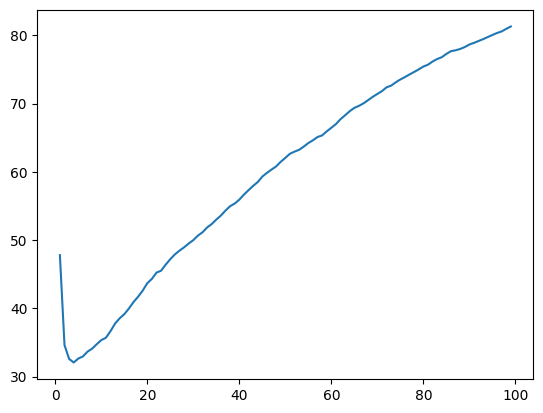

In [347]:
from sklearn.neighbors import KNeighborsRegressor

losses = []
k_values = list(range(1, 100))

for k in range(1, 100):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    losses.append(mean_squared_error(y_test, y_pred))

plt.plot(k_values, losses)

In [348]:
k = k_values[np.argmin(losses)]
k

4

In [349]:
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'R2: {r2_score(y_test, y_pred)}')

MSE: 32.05662938555783
MAE: 3.576248375719324
R2: 0.9897664672869573


### Random Forest

In [350]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = df.drop('overall_rating', axis=1)
y = df['overall_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [351]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)

y_pred = rf.predict(X_test)

print('Train Set:')
print(f'MSE: {mean_squared_error(y_train, y_train_pred)}')
print(f'MAE: {mean_absolute_error(y_train, y_train_pred)}')
print(f'R2: {r2_score(y_train, y_train_pred)}')

print()

print('Test Set:')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'R2: {r2_score(y_test, y_pred)}')

Train Set:
MSE: 0.3087528686241745
MAE: 0.2523251372642642
R2: 0.999897201620819

Test Set:
MSE: 2.11265737887507
MAE: 0.683009095971784
R2: 0.9993255701297183


### XGBoost

In [356]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = df.drop('overall_rating', axis=1)
y = df['overall_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [357]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)

y_train_pred = xgb.predict(X_train)

y_pred = xgb.predict(X_test)

print('Train Set:')
print(f'MSE: {mean_squared_error(y_train, y_train_pred)}')
print(f'MAE: {mean_absolute_error(y_train, y_train_pred)}')
print(f'R2: {r2_score(y_train, y_train_pred)}')

print()

print('Test Set:')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'R2: {r2_score(y_test, y_pred)}')

Train Set:
MSE: 0.33840231563690715
MAE: 0.4349769190993696
R2: 0.9998873472213745

Test Set:
MSE: 2.879414970446609
MAE: 0.9689970949441001
R2: 0.9990807771682739
